# Training some rough models for a personal chatbot project

Dataset: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Load data

In [137]:
df = pd.read_csv('online_fraud_data.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Remove naming columns

In [138]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

### Encode categorical features

In [139]:
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

### Preliminary exploration

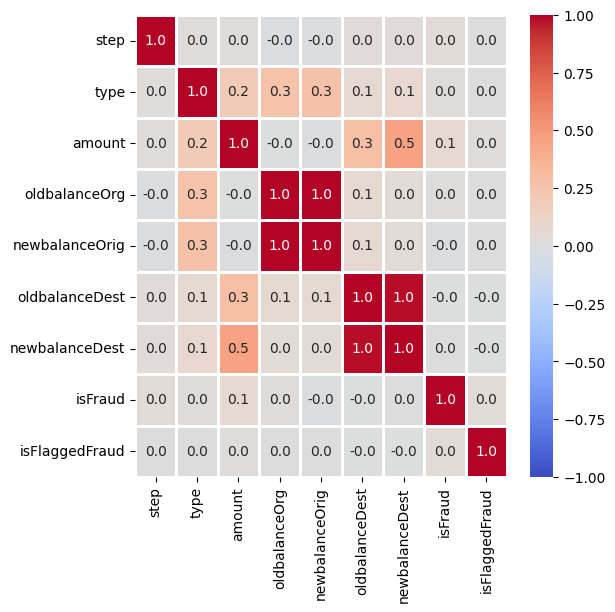

In [140]:
def feature_heat_map(df):
  """
  Plot heatmap of feature correlation matrix.
  """
  plt.figure(figsize=(6, 6))
  sns.heatmap(df.corr(),
              annot=True,
              linewidths=0.9,
              fmt=".1f", vmin=-1, vmax=1,
              cmap='coolwarm')
  plt.show()

# Explore feature correlation
feature_heat_map(df)

### Remove perfectly correlated features

Observe that the new and old balances of the destination and origin are mutually dependent.

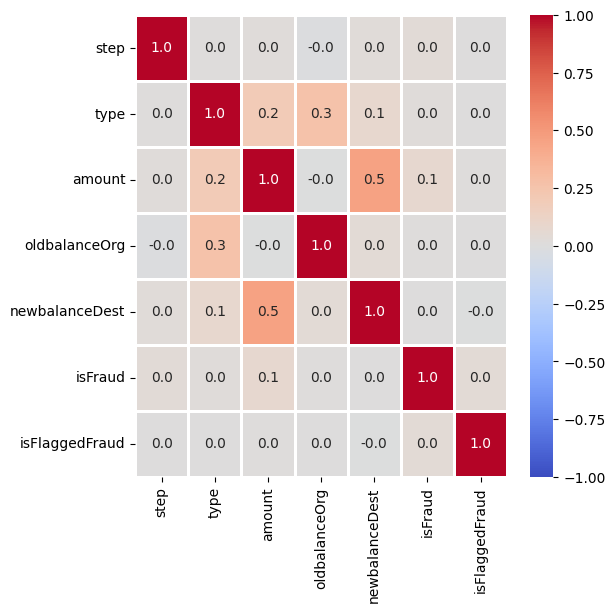

In [141]:
# Drop related features
df.drop(['newbalanceOrig', 'oldbalanceDest'], axis=1, inplace=True)

# Re-plot features
feature_heat_map(df)

### Handle null values

In [142]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


### Split into features and target

In [143]:
# Target
y = df['isFraud']

# Features
X = df.drop('isFraud', axis=1)

### Test and train split and scaling

In [144]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
print(f'Feature training shape: {X_train.shape}')
print(f'Target training shape: {y_train.shape}')
print(f'Feature test shape: {X_test.shape}')
print(f'Target test shape: {y_test.shape}')

Feature training shape: (4453834, 6)
Target training shape: (4453834,)
Feature test shape: (1908786, 6)
Target test shape: (1908786,)


### Model Functions

In [146]:
def general_model_results(y_test, y_pred) -> None:
  """
  Print general model results.
  """
  # Classification report
  print(classification_report(y_test, y_pred))

  # General results
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  print(f'Accuracy: {accuracy * 100 : .4f}%')
  print(f'Precision: {precision * 100 : .4f}%')
  print(f'Recall: {recall * 100 : .4f}%')
  print(f'F1 Score: {f1 * 100 : .4f}%')
  print(f'ROC AUC: {roc_auc * 100 : .4f}%\n')

def model_cm(y_test, y_pred) -> None:
  """
  Plot confusion matrix.
  """
  cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
  ConfusionMatrixDisplay(cm, display_labels=df['isFraud'].unique()).plot()
  plt.title('Confusion Matrix Without Normalization')
  plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906408
           1       0.80      0.80      0.80      2378

    accuracy                           1.00   1908786
   macro avg       0.90      0.90      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy:  99.9504%
Precision:  80.0840%
Recall:  80.1514%
F1 Score:  80.1177%
ROC AUC:  90.0633%



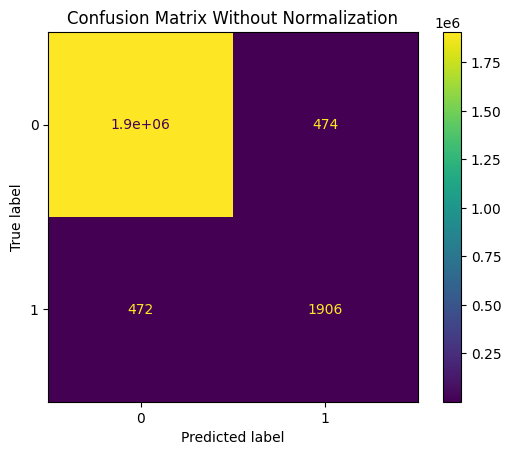

In [147]:
# Decision tree model
fraud_model_DT = DecisionTreeClassifier()
fraud_model_DT.fit(X_train, y_train)
fraud_predict_DT = fraud_model_DT.predict(X_test)

# Model performance
general_model_results(y_test, fraud_predict_DT)
model_cm(y_test, fraud_predict_DT)

### Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906408
           1       0.60      0.08      0.14      2378

    accuracy                           1.00   1908786
   macro avg       0.80      0.54      0.57   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy:  99.8786%
Precision:  59.9338%
Recall:  7.6114%
F1 Score:  13.5075%
ROC AUC:  53.8025%



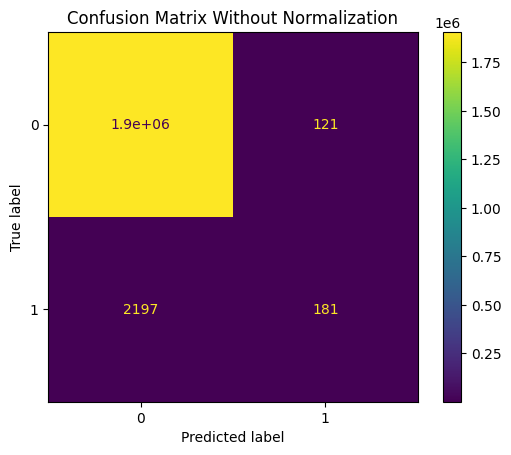

In [148]:
# Logistic regression model
fraud_model_LR = LogisticRegression(random_state=39)
fraud_model_LR.fit(X_train, y_train)
fraud_predict_LR = fraud_model_LR.predict(X_test)

# Model performance
general_model_results(y_test, fraud_predict_LR)
model_cm(y_test, fraud_predict_LR)

### Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906408
           1       0.07      0.11      0.08      2378

    accuracy                           1.00   1908786
   macro avg       0.53      0.56      0.54   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy:  99.6862%
Precision:  6.5238%
Recall:  11.3961%
F1 Score:  8.2976%
ROC AUC:  55.5962%



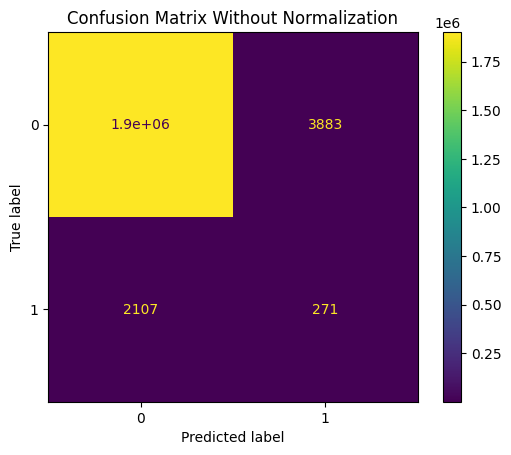

In [149]:
# Naive Bayes model
fraud_model_NB = GaussianNB()
fraud_model_NB.fit(X_train, y_train)
fraud_predict_NB = fraud_model_NB.predict(X_test)

# Model performance
general_model_results(y_test, fraud_predict_NB)
model_cm(y_test, fraud_predict_NB)

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906408
           1       0.98      0.75      0.85      2378

    accuracy                           1.00   1908786
   macro avg       0.99      0.88      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy:  99.9673%
Precision:  98.0801%
Recall:  75.1892%
F1 Score:  85.1226%
ROC AUC:  87.5937%



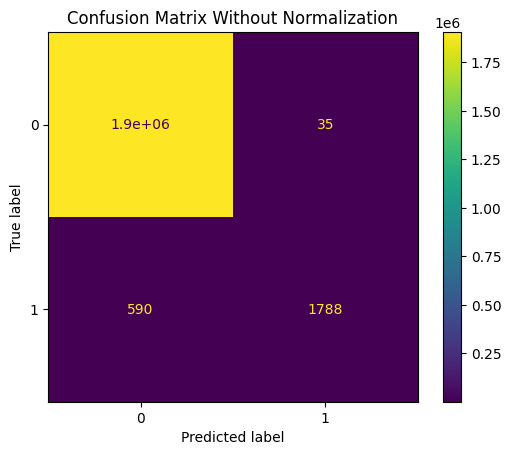

In [150]:
# Random Forest model
fraud_model_RF = RandomForestClassifier(random_state=39)
fraud_model_RF.fit(X_train, y_train)
fraud_predict_RF = fraud_model_RF.predict(X_test)

# Model performance
general_model_results(y_test, fraud_predict_RF)
model_cm(y_test, fraud_predict_RF)

### Choice of Model

Since fraud is costly when missed, the model with the highest recall should be prioritized. Therefore, the Decision Tree model will be used for the project.